# Visualizations of Regional Pathways

This notebook is used to create visualizations on the pathways given the selected policies and 50 bad scenarios.

## Imports

In [1]:
from dmdu.general.visualization import plot_regional_pathways
from model.enumerations import ProblemFormulation
import matplotlib.pyplot as plt
import os
import pandas as pd
from ema_workbench import load_results

## Directory

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    'experiments_bad'
)

## Parameters

In [3]:
problem_formulations = [

    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    # ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    # ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED,
    # ProblemFormulation.EGALITARIAN_AGGREGATED,
    # ProblemFormulation.EGALITARIAN_DISAGGREGATED,
    # ProblemFormulation.PRIORITARIAN_AGGREGATED,
    # ProblemFormulation.PRIORITARIAN_DISAGGREGATED,
]

n_references = 4
n_seeds = 2

problem_formulations_dict = {}

## Load results

In [4]:
for problem_formulation in problem_formulations:

    # Define path to load data from
    file = f'results_regional_{problem_formulation.name}'
    path = os.path.join(target_directory, file)

    # Load results
    _, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)
    print(f'{problem_formulation}: \t {len(outcomes)/50}')
    problem_formulations_dict[problem_formulation.name] = outcomes

ProblemFormulation.UTILITARIAN_AGGREGATED: 	 12.0
ProblemFormulation.UTILITARIAN_DISAGGREGATED: 	 15.0


## Visualizations

[]

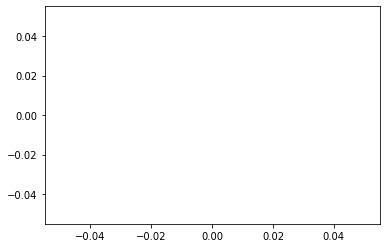

In [5]:
plt.plot()

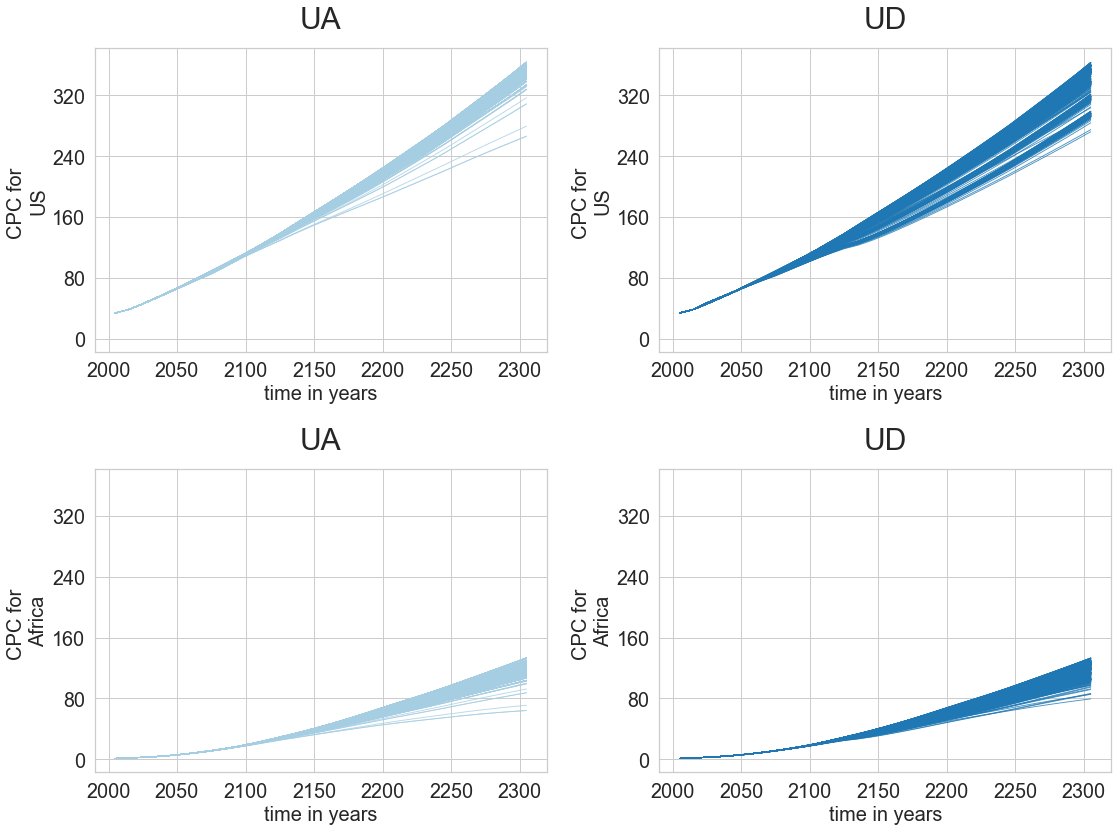

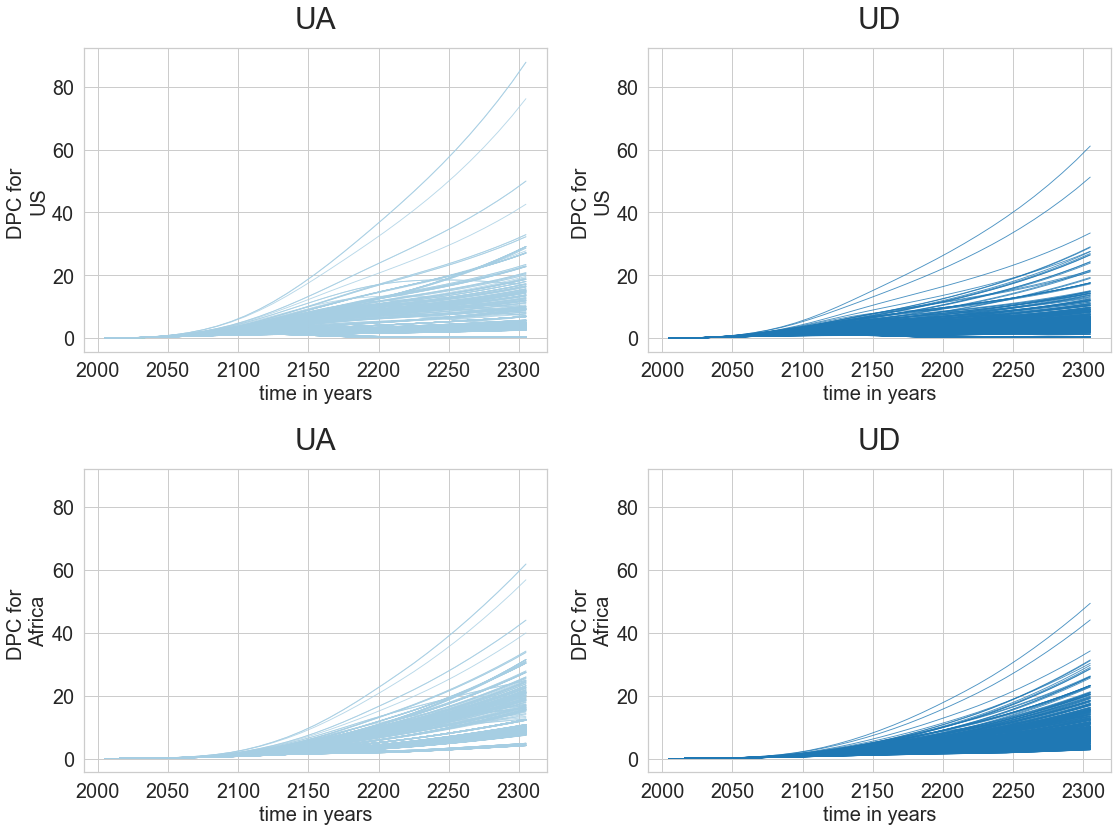

In [6]:
outcome_names = [
    'Regional CPC',
    'Regional DPC'
]

regions_list = [
    "US",
    # "China",
    "Africa",
    # "Other non-OECD Asia",
]


for outcome_name in outcome_names:

    plot_regional_pathways(
        problem_formulations_dict=problem_formulations_dict,
        outcome_name=outcome_name,
        regions_list=regions_list,
        saving=True,
        file_name=f'regional_pathways_2regions_UAUD_{outcome_name}',
        resolution=100,
    )